<a id='top'></a>

# CSCI3022 F21
# Homework 7: Testing
***

**Name**: Olivia Golden

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Wed 10 Nov**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import itertools
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [20 points] Problem 1- Time and Testing 

The beautiful cheryr blossoms of Kyoto bloomed their earliest day on record this year, signalling an early start to spring!   (see: [Washington Post](https://www.washingtonpost.com/weather/2021/03/29/japan-kyoto-cherry-blossoms-record/))  Does this mean anything?  Is this evidence of climate change?


**Part A**: Load in the data set in `kyotoflowers.csv`, a UTF-8 encoded CSV file.  The file contains two columns (with a header).

- `AD`. : Year in Gregorian calendar (Year)
- `Full-flowering date (DOY)` : Full-flowering date in Gregorian calendar (FuFD)

Citations:
Full-flowering Dates of Prunus jamasakura in Kyoto City (Plain Text Version)
(for 9th to 14th centuries: Aono and Saito, 2010; Int. J. Biometeorol.,54, 211-219)
(for 15th to 21st centuries: Aono and Kazui, 2008; Int. J. Climatol., 28, 905-914)

Begin with a **Histogram** of the data.  Label axes and choose an appropriate number of bins.  Does this data appear to be approximately normally distributed?

0        801
1        802
2        803
3        804
4        805
        ... 
1216    2017
1217    2018
1218    2019
1219    2020
1220    2021
Name: AD, Length: 1221, dtype: int64


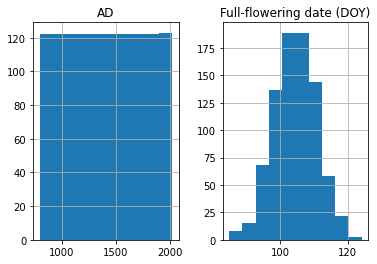

In [6]:
df=pd.read_csv('kyotoflowers.csv', encoding='UTF-8')
df.hist()
print(df['AD'])

The Full-flowering date data seems to be approximatyley normally distributed.

**Part B**:Create a line plot where `Year` is the horizontal axis and `FuFD`is the vertical axis.  Do there *visually* appear to be any patterns?

Text(0, 0.5, 'FuFD')

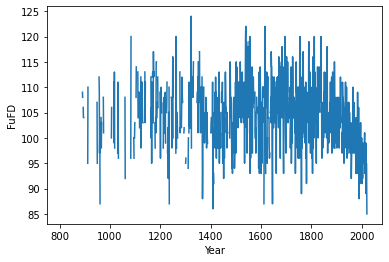

In [7]:
plt.plot(df['AD'], df['Full-flowering date (DOY)'])
plt.xlabel('Year')
plt.ylabel('FuFD')

Visually, there does not appear to be any patterns.  However, the FuFD values tend to stay between 90 and 120.

**Part C**: Print out a Tukey five-number summary for the set of full-flowering dates, as well as its mean and standard deviation.

In [9]:
df.describe()

,AD,Full-flowering date (DOY)
count,1221.000000,833.000000
mean,1411.000000,104.453782
std,352.616647,6.476146
min,801.000000,85.000000
25%,1106.000000,100.000000
50%,1411.000000,104.000000
75%,1716.000000,109.000000
max,2021.000000,124.000000


**Part D**: Suppose we wish to approach the question: is the flowering date becoming *earlier*?

Hypothesis tests give us a clear way to do this!  We can compare e.g. the last $n$ years of data to **all** the years that came before them and ask if they're coming from distributions with the same *means*.

Suppose we take the most recent 12 years of dates, from 2010-2021.  What is the mean full-flowering date for those years?  Perform a hypothesis test at $\alpha=0.01$ testing whether or not the mean from this interval is the same as the mean for the prior **all**-observed years.  If you reject the null hypothesis, output a confidence interval for the different in mean full-flowering dates for the two sets of years.

Write a sentence interpreting your results.

**Note:** there are a lot of missing observations, especially for centuries ago. Make sure you're properly not including these in in $n$ any variance/confidence/etc. calculations.

In [10]:
year_12=df.loc[(df['AD']>=2010)]
print('Average full-flowering date for 2010-2021')
print(np.mean(year_12.dropna()['Full-flowering date (DOY)']))


print('Variance of full-flowering dates for 2010-2021')
var1=np.var(year_12.dropna()['Full-flowering date (DOY)'], ddof=1)
print(np.var(year_12.dropna()['Full-flowering date (DOY)'], ddof=1))

print('Total')
print((year_12.dropna()['Full-flowering date (DOY)']).shape[0])

year=df.loc[(df['AD']<2010)]
print('Average full-flowering date for years prior 2010')
print(np.mean(year.dropna()['Full-flowering date (DOY)']))

print('Variance of full-flowering dates for years prior 2010')
var2=np.var(year.dropna()['Full-flowering date (DOY)'], ddof=1)
print(np.var(year.dropna()['Full-flowering date (DOY)'], ddof=1))
print('Total')
print((year.dropna()['Full-flowering date (DOY)']).shape[0])

Average full-flowering date for 2010-2021
94.16666666666667
Variance of full-flowering dates for 2010-2021
19.424242424242426
Total
12
Average full-flowering date for years prior 2010
104.6041412911084
Variance of full-flowering dates for years prior 2010
40.722373072695454
Total
821


$94.16666666666667-104.6041412911084=-10.43748$

$\sqrt{\frac{19.424242424242426}{12}+\frac{40.722373072695454}{821}}\approx1.29162$

$-10.28712/1.29162=-7.96450=t_{stat}$

$dof=\frac{(\frac{19.424242424242426}{12}+\frac{40.722373072695454}{821})^2}{\frac{(\frac{19.424242424242426}{12})^2}{11}+\frac{(\frac{40.784985671144476}{821})^2}{820}}\approx11.68432$

$|t_{stat}|=7.96450>t=3.0696247149756757$ so we reject the null hypothesis.

In [11]:
print(stats.t.ppf(.995, df=11.68432))

3.0696247149756757


The $99%$ confidence interval is $-10.43748\pm(3.0665737135454183*1.23827)\approx[-14.23472,-6.64023]$

We reject the null hypothesis that the means of both sets are equal, and are 99% confident that the difference between the means is on the interval $[-14.23472,-6.64023]$.

Was the test in part D appropriate to answer a broad question like "does the full flowering data reflect the presence of global warming?"  What tests could we have run instead?

The above test is reasonable to use to compare previous to current years. Instead, it is possible to use linear regression to measure the change in date per year.

**Part F**: We should have rejected the null hypothesis in Part D.  But sometimes, people do some shifty things with data.  And we could, too!  One way to be statistically disingenuous is known as $p$-fishing or $p$-hacking.  This process represent the idea of "cherry-picking" through our data to find *subsets* of the data that most support a desired conclusion.

Suppose we - for whatever reason - really wish to use this data set to come to the conclusion that "there is no difference in full flowering datas between now and the past."  To support this conclusion, we devise the following idea:

- Consider *every single* list of 12 consecutive years starting with 1600-1611, then 1601-1612, then 1602-1613.
- For *each* one of those 12-year intervals, generate the 99% confidence interval for the difference in the mean `FuFD`  over  those 12 years' to the mean from most recent 12 years from 2010-2021.

From that list of confidence intervals, print out a list of **every** starting year for an interval that contains zero. (e.g if the confidence interval for comparing 1618-1632 to 2007-2021 contains zero, then print `1618`.)  Report:
- The earliest date of such an interval containing zero.
- The latest date where such an interval **does not** contain zero.

Then write two sentences of how you could interpret those two results to conclude *either* that the flowering dates are getting earlier **or** that they are not getting earlier.

In [34]:
df_present = df.copy()
df_present = df_present.loc[(df_present['AD']>=2010),'Full-flowering date (DOY)']
mean_present=np.mean(df_present)
var_present=np.var(df_present)
n=len(df_present)
CI=[]

for i in range(1600,2011):
    df_past=df.copy()
    df_past=df_past.loc[(df_past['AD']>=i) & (df_past['AD']<=(i+11)),'Full-flowering date (DOY)']
    df_past=df_past.dropna()
    m=len(df_past)

    var_past=np.var(df_past, ddof=1)
    mean=mean_present-np.mean(df_past)
    se=np.sqrt(var_past/m+var_present/n)
    dof=(var_present/n + var_past/m)**2/((var_present/n)**2/(n-1)+(var_past/m)**2/(m-1))
    t= stats.t.ppf(.995, dof)
    
    lower=mean-(t*se)
    upper=mean+(t*se)
    CI.append([lower, upper])
    if (upper>0):
        print(i)
    


1601
1625
1971
1972
1976
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010


The dates of flowering dates are not significantly earlier when comparing 2010-2021 to 1600-1611.  However, it required many tests to come to this conclusion.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [10 points] Problem 2: Testing and CI Theories; quick problems


#### 2A (4 pts):
Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


Some scientists are using p values as evidence of the extent a statement is true, assigning the p value as the percent that a statement is true, and suggesting that a lower p value guarantees transparancy.  These misconceptions lead to misinterpreted results.  The article suggests moving the threshold value from .05 to .005. I think this is a good suggestion, as it will remove false results created from a p value that is too close to .05.  Other suggestions to remedy this problem include using the exact p value, abandoning p values and using alternative inference methods. 



#### 2B (2pts):

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate?   **Justify** your answer in complete English sentences.

It would be better to have a low Type II error rate.  It is better to have more errors suggesting that we rejected the idea that the plane was safe when it actually was than to have more errors suggesting that we failed to reject the idea that the plane was safe when it wasn't.

#### 2C (4pts):
In an 1881 study Michelson and Newcomb measured the time light took to travel 7.44373 kilometers. Inspecting their study and the descriptions of their 66 measurements, it is reasonable to assume that the data were iid.  Their measurements are below.

Construct an approximate 99\% confidence interval for the time light takes to travel 7400 meters.

Then perform a hypothesis test on whether or not this value significant differs from the approximation that $c=3.0 \cdot 10^8$ meters per second. (Note: The true vale of $c=299792458 \frac{m}{s}$, and your confidence interval can be converted to $\frac{s}{m}$.)

In [35]:
data=[24.828,24.826,24.833,24.824,24.834,24.756,24.827,24.816,24.84,24.798,24.829,24.822,\
      24.824,24.821,24.825,24.83,24.823,24.829,24.831,24.819,24.824,24.82,24.836,24.832,\
      24.836,24.828,24.825,24.821,24.828,24.829,24.837,24.825,24.828,24.826,24.83,24.832,\
      24.836,24.826,24.83,24.822,24.836,24.823,24.827,24.827,24.828,24.827,24.831,24.827,\
      24.826,24.833,24.826,24.832,24.832,24.824,24.839,24.828,24.824,24.825,24.832,24.825,\
      24.829,24.827,24.828,24.829,24.816,24.823]

In [36]:
print(np.mean(data))
print(np.std(data))

alpha=0.01
n=66
mean_t_CI = [np.mean(data) + pm*stats.t.ppf(1-alpha/2, n-1)*np.std(data, ddof=1)/np.sqrt(n) for pm in [-1,1]]
print("t-CI for mean: [{:.3f}, {:.3f}]".format(mean_t_CI[0], mean_t_CI[1]))


24.826212121212123
0.010663610099255412
t-CI for mean: [24.823, 24.830]


$24.826212121212123\pm2.58(\frac{0.010663610099255412}{\sqrt{66}})\approx[24.82282,24.82959]$

$[24.823, 24.830]=>[\frac{7443.73}{24.830}, \frac{7443.73}{24.823}]\approx[299.78775, 299.87229]$

Since the approximation of c, $c=3.0*10^8\frac{m}{s}$ does not lie on the 99% confidence interval, we reject the null hypothesis that the value does not differ significantly from the approximation.

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [15 points] Problem 3 - The power!


Let $Y$ be the number of heads in 100 tosses of a possibly biased coin, with probability of heads on any toss $p$. Similar to the Belgian Euro example, we hope to *test* whether the coin is biased **toward heads**.

#### Part a)

State the null and alternative hypotheses.


Null hypothesis - p=.50

Alternative hypothesis - p>.50



#### Part b)
Suppose we define the rejection region to be $Y > 55$. 

Calculate the rate of type I error of this test. (For this, and all remaining parts, calculate probabilities **exactly**, i.e., without using a normal approximation)


$P(Y>55)=1-P(Y\leq55)$

In [37]:
print(1-stats.binom.cdf(55, 100, .5))

0.1356265120369171



#### Part c)

Simulate a single dataset (or appropriate summary of a dataset) under the null hypothesis, and apply your test from part (a). State your conclusion. Is your conclusion in error? If so, which type?

Repeat this process 1000 times in total and verify that the error rate appears consistent with your calculations in part b).


In [38]:
import random

Y=0
for i in range(100):
    flip=random.randint(0,1)
    if(flip==1):
        Y+=1
print(Y)

56


Y=58>55 so we reject the null hypothesis. This is a type 1 error since we used the criteria of a fair coin to construct the simulation.  This means that the null hypothesis was correct but we still rejected it.

In [39]:
error=0
for i in range(1000):
    Y=0
    for i in range(100):
        flip=random.randint(0,1)
        if(flip==1):
            Y+=1
    if (Y>55):
        error+=1
print('Type 1 Error Rate')
print(error/1000)           

Type 1 Error Rate
0.117



#### Part d)
Consider that the *reality* of a biased coin could take on any number of possible different values of actual bias $p$.  Construct a grid/list of possible values $p$ for the alternative hypothesis $p_{alt}=[0.51,0.52,0.53, \dots .99, 1.00]$.

For each value of $p$ in this list, calculate the power of the test from part $a$.  If possible, return exact values rather than simulated/estimated probabilities.

(Recall: statistical **power** is the probability of rejecting the null hypothesis while the alternative hypothesis is true). 

Plot the power ($y$-axis) against $p$ ($x$-axis) over each of these scenarios. 

Interpret/comment on this plot. Specifically, as $p$ gets *further* from the specified $p=p_0$ under the null hypothesis, what happens to the power?

Text(0, 0.5, 'Power')

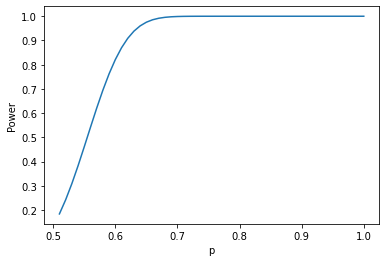

In [13]:
p_alt=[]
for i in range(1,51):
    p_alt.append(.50+(i/100))

power=[]
for i in range(len(p_alt)):
    beta=stats.binom.cdf(55, 100, p_alt[i])
    power.append(1-beta)
plt.plot(p_alt, power)
plt.xlabel('p')
plt.ylabel('Power')

As p gets further from the specified $p=p_0$ the power increases.  This makes sense since the likelihood of accepting the null hypothesis when the alternative hypothesis is true is higher when $p_{alt}$ is more similar to $p_0$


#### Part e)

(e) Suppose we allowed other rejection regions than $Y>55$.  Use the ideas in part (d) to answer the following: how many flips $m$ of a coin are necessary to achieve both $\alpha=0.05$ **and** $\beta=0.05$ for the hypothesis in part (a)?

*Hint*: You can brute force this to find the first value of $n$ that satisfies the requirement.  It's quite a few flips...

In [120]:
def alpha_test(flips):
    start=flips/2
    if (flips%2!=0):
        start=(flips+1)/2
    for i in range(int(start),flips):
        if (((1-stats.binom.cdf(i, flips, .5)))-.05<1e-5):
            return i

alpha_test(11)
flips=1000
while(alpha!=.05 and beta!=.05):
    head_count=alpha_test(flips)
    #print(stats.binom.cdf(head_count, flips, .51))
    if (stats.binom.cdf(head_count, flips, .51)-.05<1e-5):
        print(flips)
        break
    else: 
        flips+=5

27090
